
##### UK Housing Prices Paid
##### To predict the prices of real estate in the UK using different models 

Features:
Transaction unique identifier (ignore).
Price (decimal): sale price (target).price stated on the transfer deed
Date of transfer (date): Sale date.
Property type (categorical): one of five categories D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
Old/New (T/F): age of property.Y = a newly built property, N = an established residential building
Duration (categorical): relates to tenure F=freehold ( you own the property and the land), L=Leasehold(property but not land), U = unknown
Town (Categorical): one of 1170 towns/cities.
District(categorical): one of 454 districts.
County (categorical): one of 127 counties.
PPD Category (categorical): one of two categories (A, B).A = Standard Price Paid entry,B = Additional Price Paid entry including transfers under a power of sale/repossessions
Record Status (categorical): one of three categories (ignore).

##### Hypotheses
Old properties tend to have lower prices compared to new properties.
Terraced and semi-detached properties generally have higher prices than flats or maisonettes.
Properties located in cities typically command higher prices.
More recent property sales usually reflect higher prices compared to older sales.
Location factors such as county and district also significantly influence property prices.

In [75]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge as RidgeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV 
from tabulate import tabulate

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from livelossplot import PlotLossesKeras



##### Data_Reader and Profile

In [2]:
file_name = 'price_paid_records.csv'

In [3]:
df = pd.read_csv(file_name)

In [4]:
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A


In [5]:
#created a sample (1%) of the data and shuffle it
df = df.sample(frac=0.01, random_state=42).reset_index(drop=True)

In [6]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224893 entries, 0 to 224892
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction unique identifier      224893 non-null  object
 1   Price                              224893 non-null  int64 
 2   Date of Transfer                   224893 non-null  object
 3   Property Type                      224893 non-null  object
 4   Old/New                            224893 non-null  object
 5   Duration                           224893 non-null  object
 6   Town/City                          224893 non-null  object
 7   District                           224893 non-null  object
 8   County                             224893 non-null  object
 9   PPDCategory Type                   224893 non-null  object
 10  Record Status - monthly file only  224893 non-null  object
dtypes: int64(1), object(10)
memory usage: 18.9+ MB


In [7]:
df.describe()

,Price
count,2.248930e+05
mean,1.783792e+05
std,3.729617e+05
min,1.000000e+00
25%,7.500000e+04
50%,1.300000e+05
75%,2.100000e+05
max,6.329900e+07


In [8]:
#shape of the dataset
df.shape

(224893, 11)

##### Preprocessing 

In [9]:
#sum of missing values per column
df.isnull().sum()

Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64

In [10]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

##### Data Visualization

<Axes: title={'center': 'Average Property Price by Year of Transfer'}, xlabel='year', ylabel='Price'>

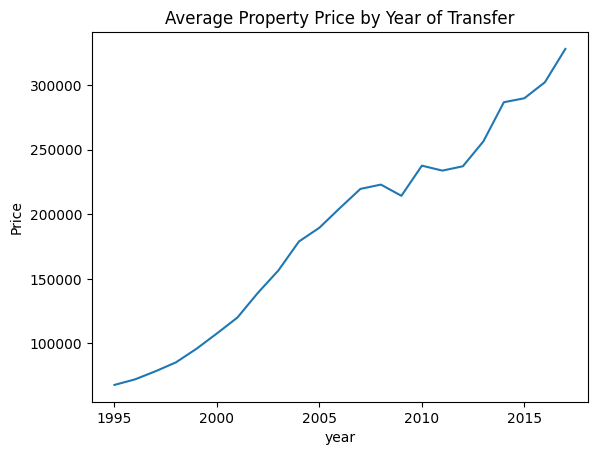

In [11]:
# Convert 'Date of Transfer' to datetime format
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
df['year'] = df['Date of Transfer'].dt.year # Extract year from 'Date of Transfer'
plt.title("Average Property Price by Year of Transfer")
sns.lineplot(data=df.groupby('year')['Price'].mean()) # Plot average price by year

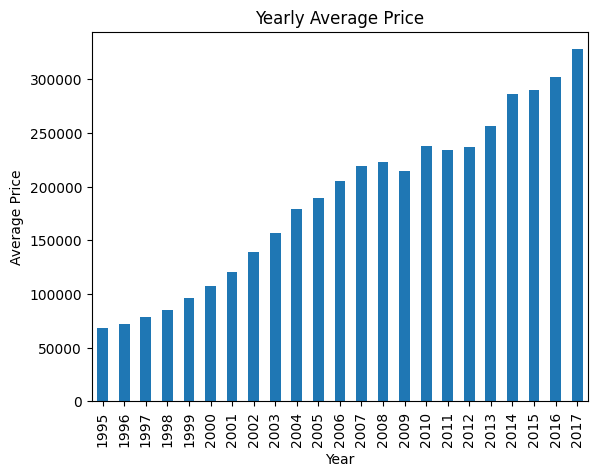

In [12]:
# Yearly Average Price
df.groupby('year')['Price'].mean().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Average Price')
plt.show()

<Figure size 1200x400 with 0 Axes>

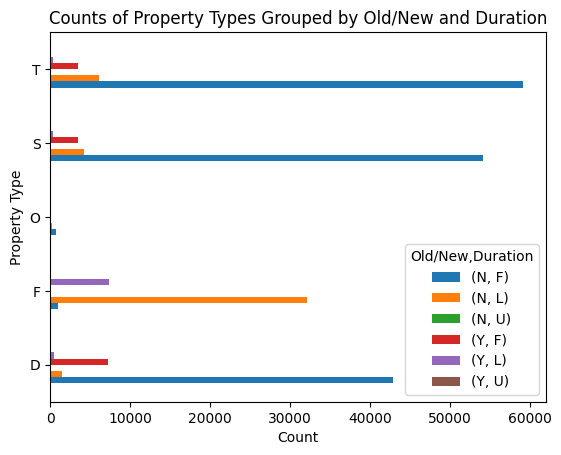

In [13]:
#Visualizing Property type vs old/new and duration
plt.figure(figsize=(12,4))
ax = pd.crosstab(df["Property Type"], [df["Old/New"], df["Duration"]]).plot.barh()
plt.title("Counts of Property Types Grouped by Old/New and Duration")
ax.set_xlabel("Count")
plt.show()

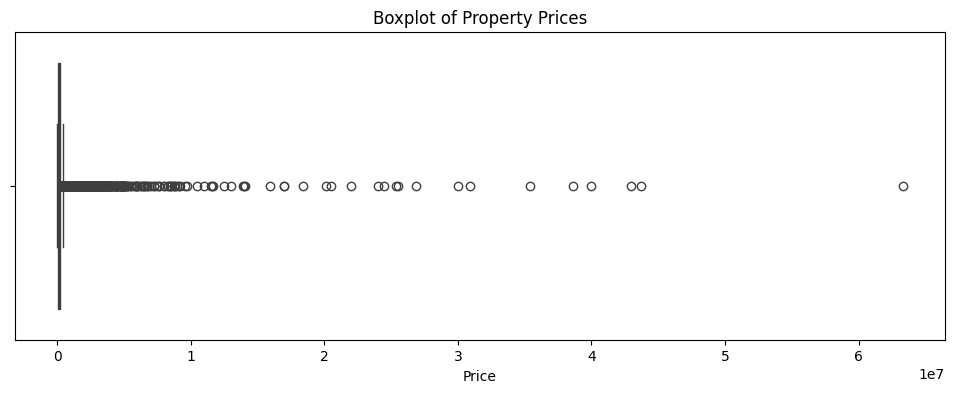

In [14]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Property Prices")
plt.xlabel("Price")
plt.show()


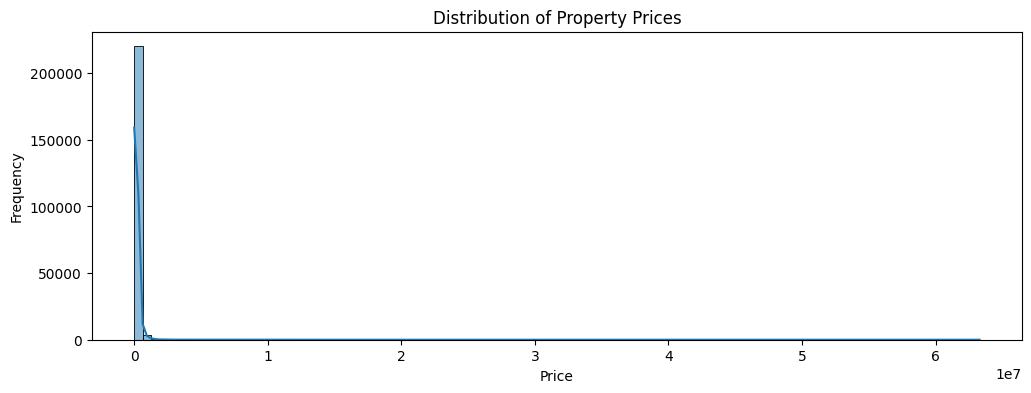

In [15]:
plt.figure(figsize=(12, 4))
sns.histplot(df['Price'], bins=100, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

<Figure size 1200x400 with 0 Axes>

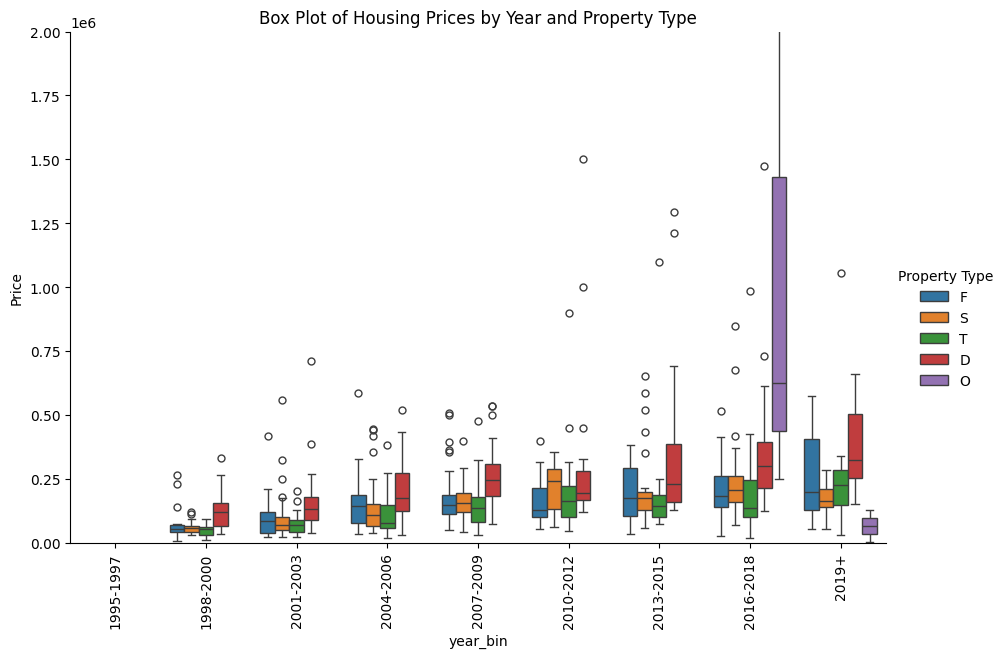

In [17]:
df_sample = df.sample(n=1000, random_state=42).reset_index(drop=True)

# Define bins starting from 1995 to 2015 in steps of 3 years
bins = list(range(1995, 2018, 3)) 
 
# Add a lower bound and upper bound to cover values outside this range if needed
bins = [1994, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019]
labels = [
    '1995-1997', '1998-2000', '2001-2003',
    '2004-2006', '2007-2009', '2010-2012', '2013-2015',
    '2016-2018', '2019+'
]
# Create the binned year column

df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False, duplicates='drop')
plt.figure(figsize=(12,4))
sns.catplot(x='year_bin', y='Price', hue='Property Type', kind='box', data=df_sample, height=6, aspect=1.5)
plt.ylim(0, 2000000)  # Set y-axis limit to 1 million
plt.title("Box Plot of Housing Prices by Year and Property Type")
plt.xticks(rotation=90)
plt.show()


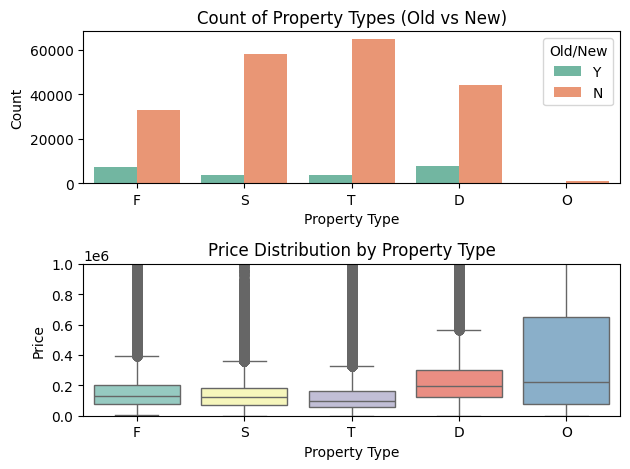

In [18]:
# Plot 1 — Count of Property Type by Old/New
plt.subplot(2, 1, 1)
sns.countplot(x='Property Type', hue='Old/New', data=df, palette='Set2')
plt.title("Count of Property Types (Old vs New)")
plt.xlabel("Property Type")
plt.ylabel("Count")

# Plot 2 — Price Distribution by Property Type
plt.subplot(2, 1, 2)
sns.boxplot(x='Property Type', y='Price', data=df, palette='Set3')
plt.title("Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.ylim(0, 1000000)  # Optional: trim outliers for visibility

plt.tight_layout()
plt.show()


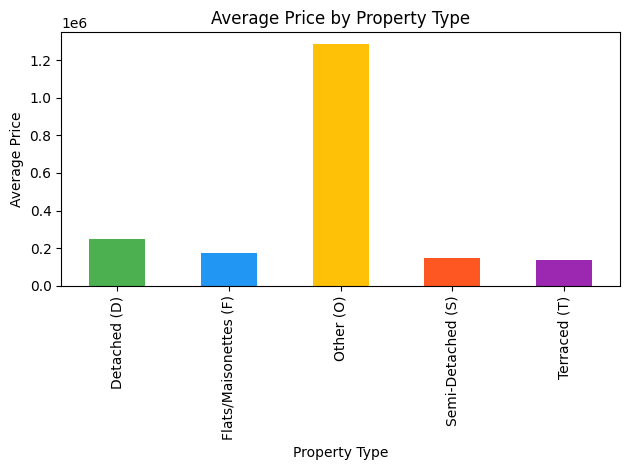

In [19]:
avg_price = df.groupby('Property Type')['Price'].mean()
ax = avg_price.plot(kind='bar', color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0'])
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average Price by Property Type')
tick_positions = range(len(avg_price))
tick_labels = ['Detached (D)', 'Flats/Maisonettes (F)', 'Other (O)', 'Semi-Detached (S)', 'Terraced (T)']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
plt.tight_layout()
plt.show()



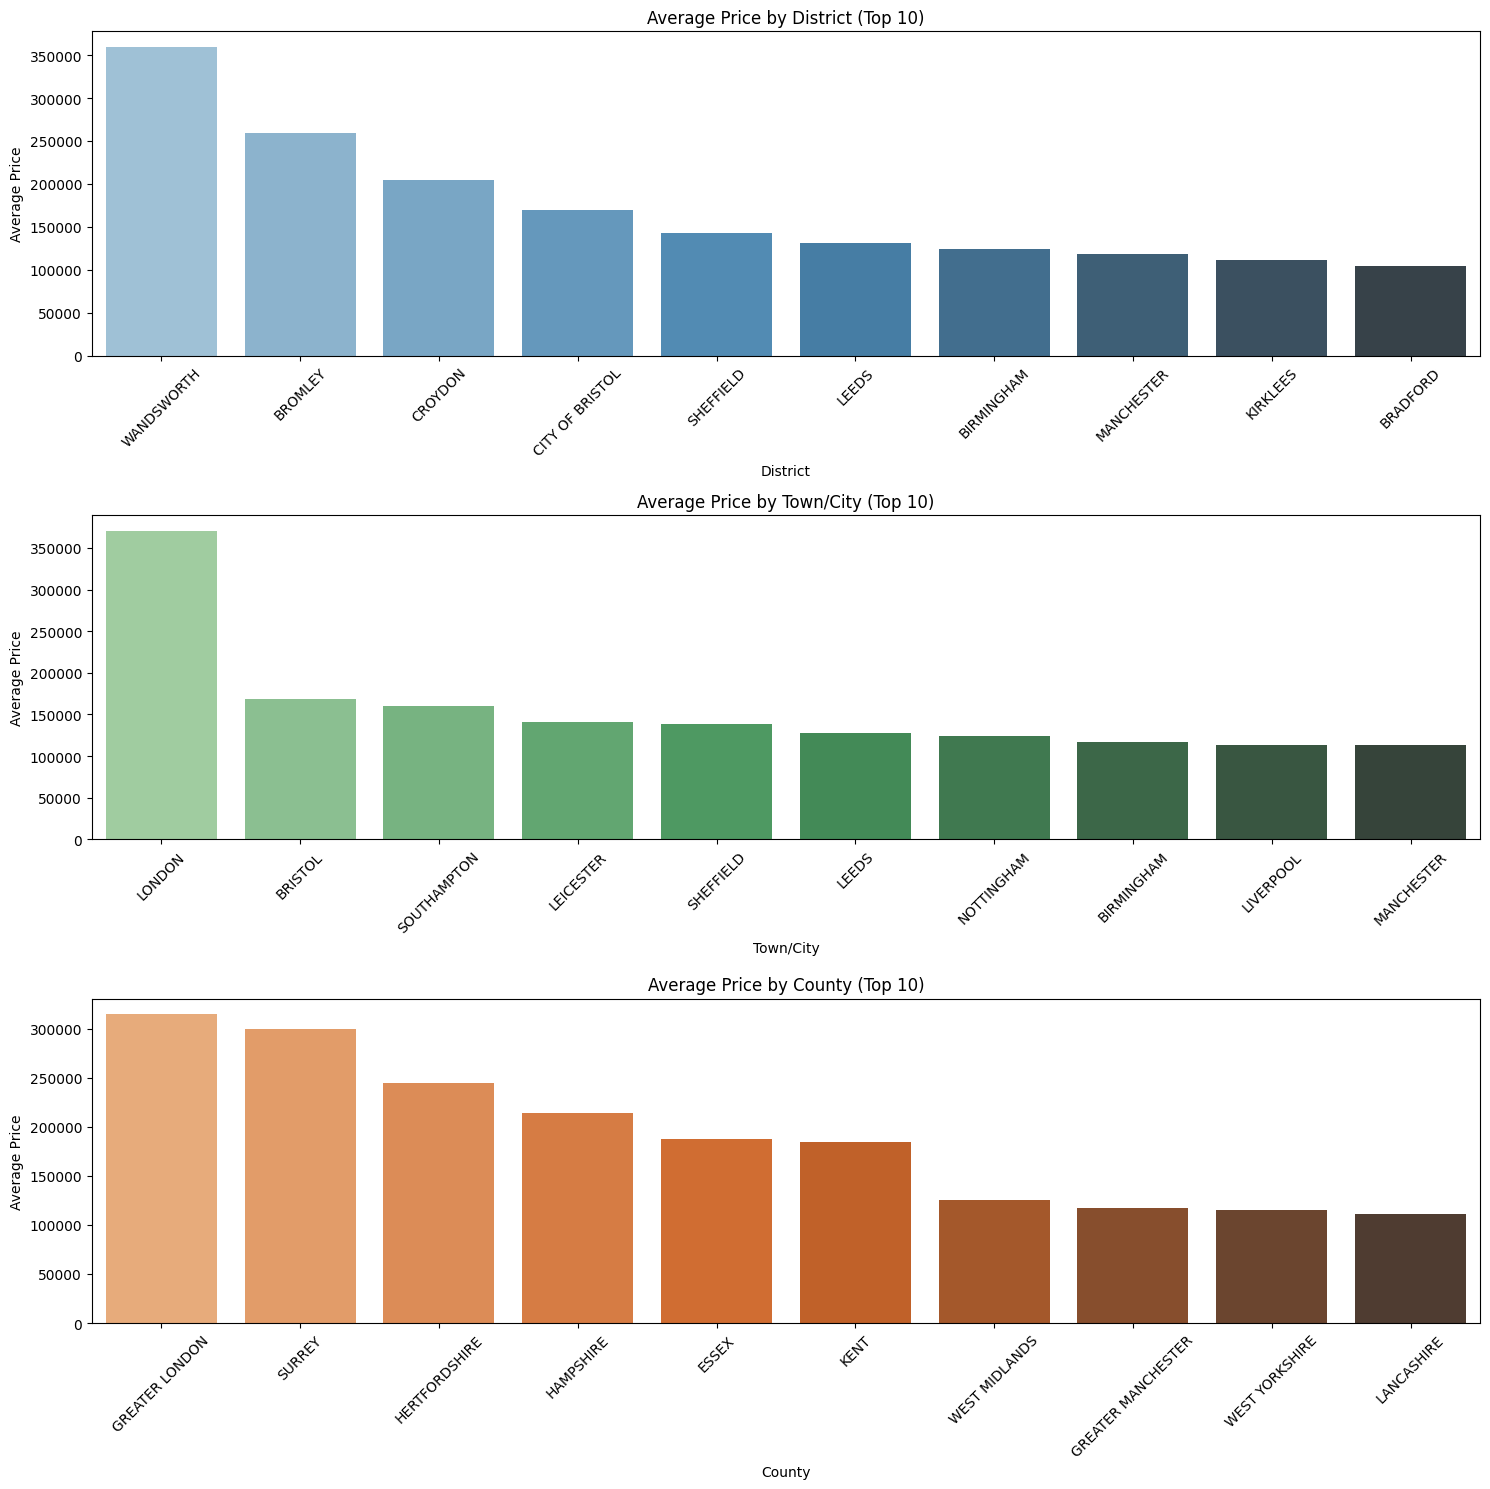

In [20]:
# Set figure size and layout
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Plot 1 — District
top_districts = df['District'].value_counts().nlargest(10).index
district_avg = df[df['District'].isin(top_districts)].groupby('District')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=district_avg.index, y=district_avg.values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Average Price by District (Top 10)")
axes[0].set_ylabel("Average Price")
axes[0].set_xlabel("District")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2 — Town/City
top_cities = df['Town/City'].value_counts().nlargest(10).index
city_avg = df[df['Town/City'].isin(top_cities)].groupby('Town/City')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=city_avg.index, y=city_avg.values, ax=axes[1], palette="Greens_d")
axes[1].set_title("Average Price by Town/City (Top 10)")
axes[1].set_ylabel("Average Price")
axes[1].set_xlabel("Town/City")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3 — County
top_counties = df['County'].value_counts().nlargest(10).index
county_avg = df[df['County'].isin(top_counties)].groupby('County')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=county_avg.index, y=county_avg.values, ax=axes[2], palette="Oranges_d")
axes[2].set_title("Average Price by County (Top 10)")
axes[2].set_ylabel("Average Price")
axes[2].set_xlabel("County")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

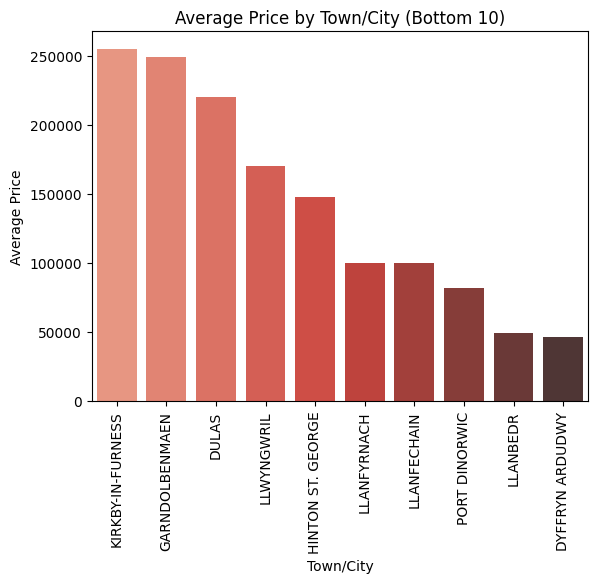

In [21]:

bottom_cities = df['Town/City'].value_counts().nsmallest(10).index
city_avg = df[df['Town/City'].isin(bottom_cities)].groupby('Town/City')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=city_avg.index, y=city_avg.values, palette="Reds_d")
plt.title("Average Price by Town/City (Bottom 10)")
plt.xlabel("Town/City")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

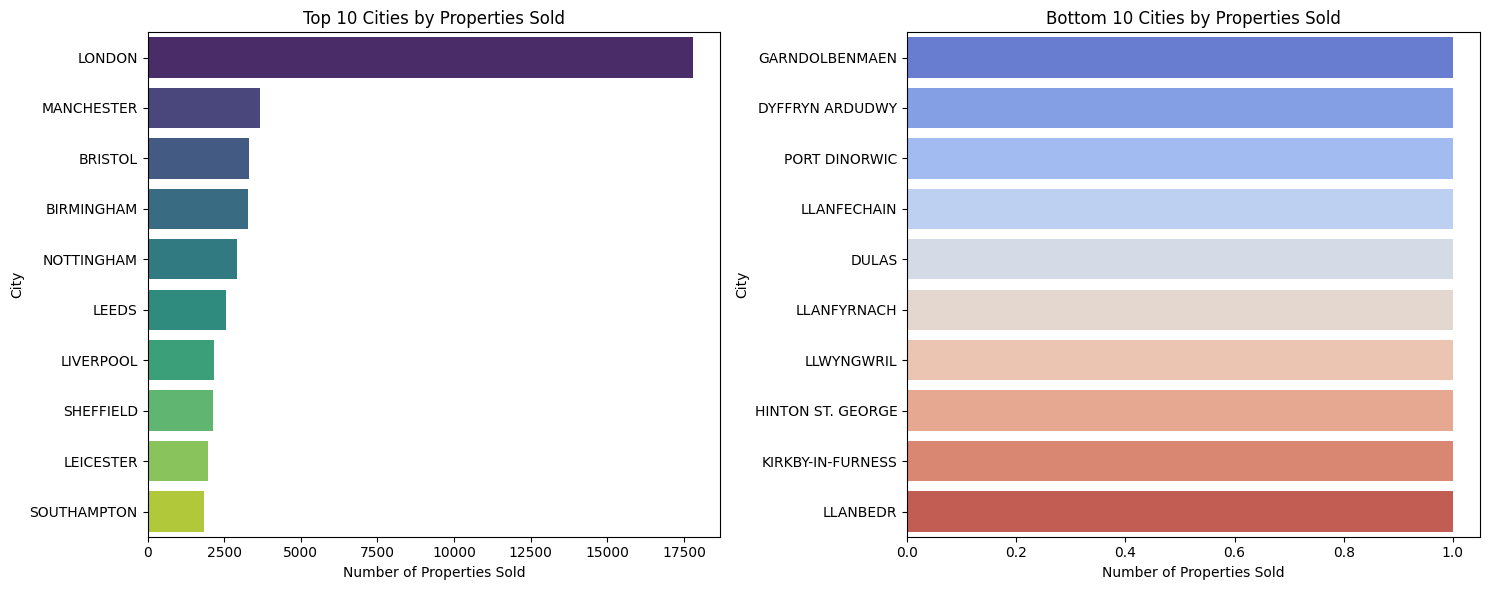

In [22]:
#sub plots of top 10 cities by property sold and bottom 10 cities by property sold

# Calculate counts
city_counts = df['Town/City'].value_counts()

top_cities = city_counts.nlargest(10)
bottom_cities = city_counts.nsmallest(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1 — Top 10 Cities
sns.barplot(x=top_cities.values, y=top_cities.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Cities by Properties Sold')
axes[0].set_xlabel('Number of Properties Sold')
axes[0].set_ylabel('City')

# Plot 2 — Bottom 10 Cities
sns.barplot(x=bottom_cities.values, y=bottom_cities.index, ax=axes[1], palette='coolwarm')
axes[1].set_title('Bottom 10 Cities by Properties Sold')
axes[1].set_xlabel('Number of Properties Sold')
axes[1].set_ylabel('City')

plt.tight_layout()
plt.show()


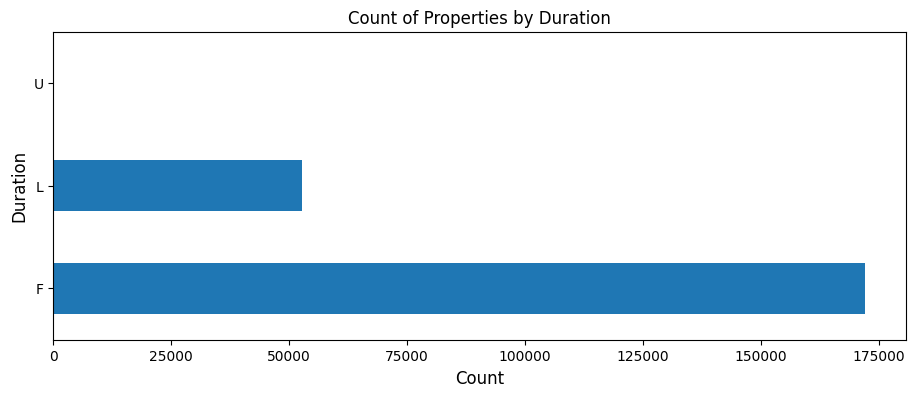

In [23]:
plt.figure(figsize=(11,4))
plt.title("Count of Properties by Duration", fontsize = 12)
ax = df["Duration"].value_counts().plot.barh()
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("Duration", fontsize = 12)
plt.show()

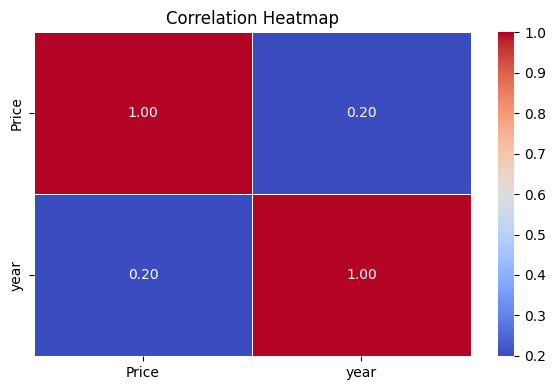

In [24]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### Processing 

In [25]:
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,year,year_bin
0,{6146E264-E0D9-4C53-ACC8-48DB3954F80B},95200,2007-11-23,F,Y,L,SWINDON,SWINDON,SWINDON,A,A,2007,2010-2012
1,{26EBD75A-D90F-411C-85E5-4D56F0F66484},199950,2013-06-28,S,Y,F,BINGLEY,BRADFORD,WEST YORKSHIRE,A,A,2013,2016-2018
2,{E700C723-9426-4924-8D3F-1730EC3B2BCC},132000,2001-06-26,S,N,F,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,A,A,2001,2004-2006
3,{677E0E46-8E8F-4560-AD93-07F72D5AE6D5},60000,1997-10-31,S,N,F,CAERPHILLY,CAERPHILLY,CAERPHILLY,A,A,1997,1998-2000
4,{E2387F76-24EC-4A7E-8A27-220E500F0DC2},87000,1998-02-23,S,N,F,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A,1998,2001-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224888,{9D5A5F8F-C8F3-4692-B7E1-0F9587E9872E},66500,2003-07-18,T,N,F,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A,2003,2004-2006
224889,{E21A06A1-D571-4899-8BD9-127D520B3963},150000,2005-10-21,S,N,F,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A,2005,2007-2009
224890,{1103ACD5-E720-4576-9C8E-22C5E7AE4238},64000,1998-09-25,S,N,L,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A,1998,2001-2003
224891,{2618BA81-B046-4D17-872D-1B189DB79EEE},256000,2014-04-10,S,N,F,HOCKLEY,ROCHFORD,ESSEX,A,A,2014,2016-2018


In [26]:
# Drop irrelevant columns
df_clean = df.drop(columns=['Transaction unique identifier', 'Record Status - monthly file only','year_bin', 'year'])

In [27]:
# Feature Engineering 
# Extract Year, Month, Quarter, Day of Week from 'Date of Transfer'
df_clean['Date of Transfer'] = pd.to_datetime(df_clean['Date of Transfer'], errors='coerce')
df_clean['Year'] = df_clean['Date of Transfer'].dt.year
df_clean['Month'] = df_clean['Date of Transfer'].dt.month
df_clean['Quarter'] = df_clean['Date of Transfer'].dt.quarter


# Drop the date column
df_clean = df_clean.drop(columns=['Date of Transfer'])

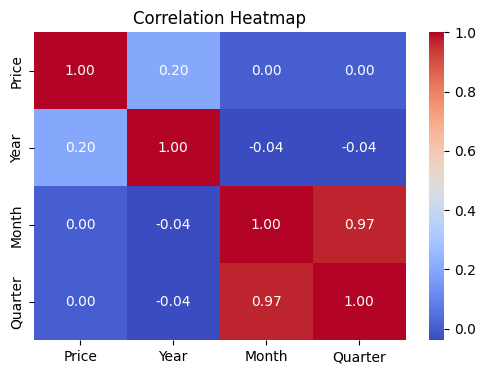

In [28]:
#Correlation Heatmap (on numeric columns)


corr = df_clean[['Price', 'Year', 'Month', 'Quarter']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [29]:
#Remove outliers using Interquartile Range (IQR)
# Step 1: Compute IQR bounds
Q1 = df_clean['Price'].quantile(0.25)
Q3 = df_clean['Price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define upper and lower bounds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR  # Optional, for very low outliers

# Step 3: Filter the DataFrame
df_clean = df_clean[(df['Price'] >= lower_limit) & (df['Price'] <= upper_limit)]



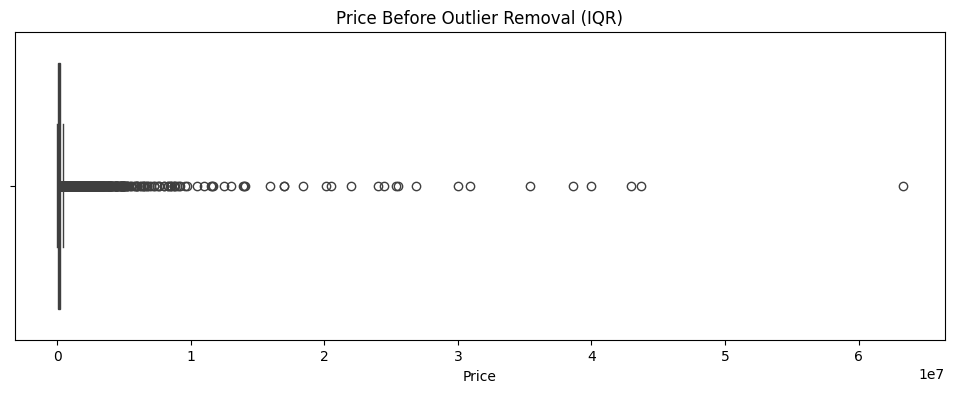

In [30]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Price'])
plt.title("Price Before Outlier Removal (IQR)")
plt.show()

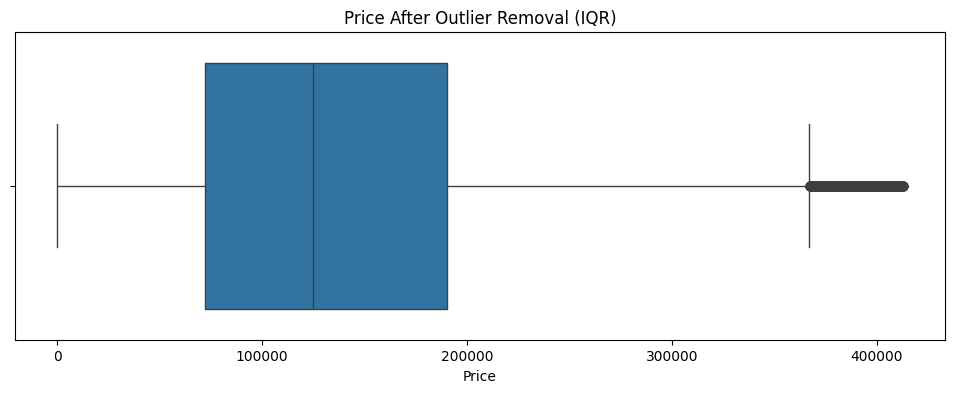

In [31]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_clean['Price'])
plt.title("Price After Outlier Removal (IQR)")
plt.show()

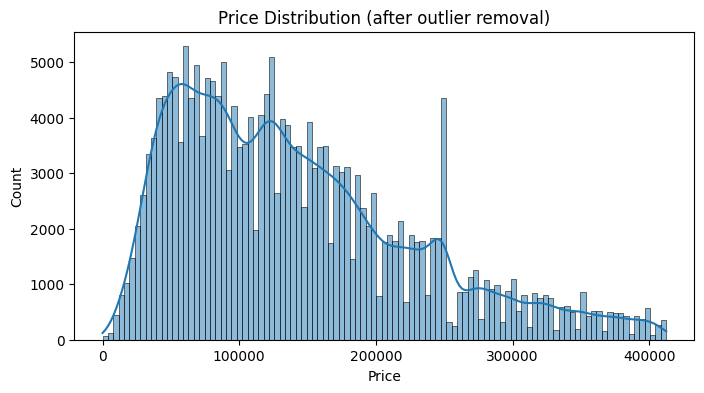

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['Price'], kde=True)
plt.title('Price Distribution (after outlier removal)')
plt.show()

In [33]:
#how many outliers are there
df_clean['Price'].describe()

count    211544.000000
mean     141238.499069
std       87383.902900
min           1.000000
25%       72000.000000
50%      124950.000000
75%      190000.000000
max      412500.000000
Name: Price, dtype: float64

In [34]:
df['Price'].describe()

count    2.248930e+05
mean     1.783792e+05
std      3.729617e+05
min      1.000000e+00
25%      7.500000e+04
50%      1.300000e+05
75%      2.100000e+05
max      6.329900e+07
Name: Price, dtype: float64

In [35]:
#Target Transformation
df_clean['Price_log'] = np.log1p(df_clean['Price'])

In [36]:
#splitting the dataset
target = 'Price_log'
X = df_clean.drop(columns=['Price', target])
y = df_clean[target]

In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
#Define preprocessing Pipeline 
numeric_cols = [ 'Year', 'Month', 'Quarter']
categorical_cols = ['Property Type', 'Old/New', 'Duration', 'Town/City', 'District', 'County', 'PPDCategory Type']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    , ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

In [39]:
# Fit transform on training, transform on test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

##### Models

In [40]:
def train_and_evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, model_name="Model"):

    pd.options.display.float_format = '{:.4f}'.format
    
    # 1. Fit the model
    model.fit(X_train_processed, y_train)

    # 2. Predict
    y_pred = model.predict(X_test_processed)

    # 3. Inverse log transformation (if you log-transformed target)
    y_test_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred)

    # 4. Evaluate
    rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    r2 = r2_score(y_test_real, y_pred_real)
    mae = mean_absolute_error(y_test_real, y_pred_real)
    mse = mean_squared_error(y_test_real, y_pred_real)

    # 5. Print metrics
    print(f"\n📊 {model_name} Performance:")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAE: {mae:,.2f}")
    print(f"MSE: {mse:,.2f}")
    print(f"R²: {r2:.3f}")

    # 6. Plot predictions vs actual
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test_real, y=y_pred_real, alpha=0.5)
    plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.tight_layout()
    plt.show()

    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

#### Train and evaluate models


📊 Linear Regression Performance:
RMSE: 58,315.38
MAE: 40,743.82
MSE: 3,400,683,374.11
R²: 0.552


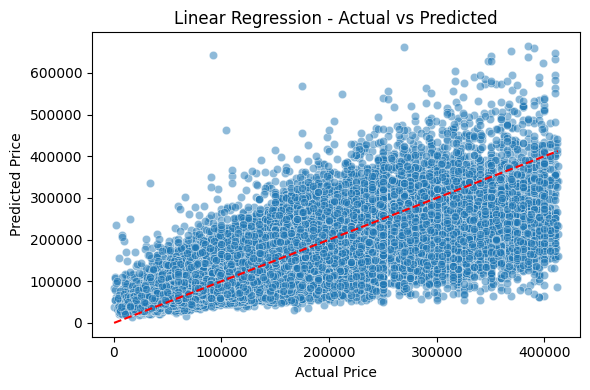


📊 KNeighborsRegressor Performance:
RMSE: 58,283.73
MAE: 40,677.37
MSE: 3,396,992,714.12
R²: 0.553


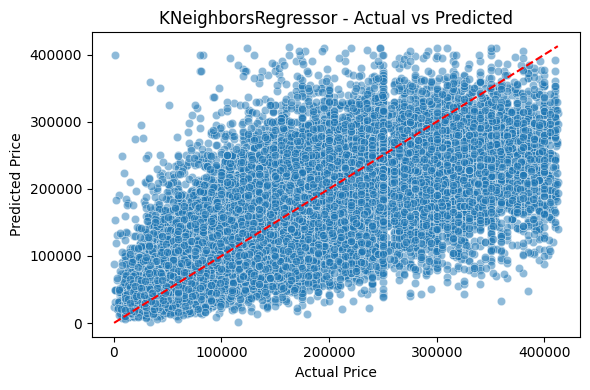


📊 RidgeRegressor Performance:
RMSE: 58,220.64
MAE: 40,698.12
MSE: 3,389,642,564.80
R²: 0.554


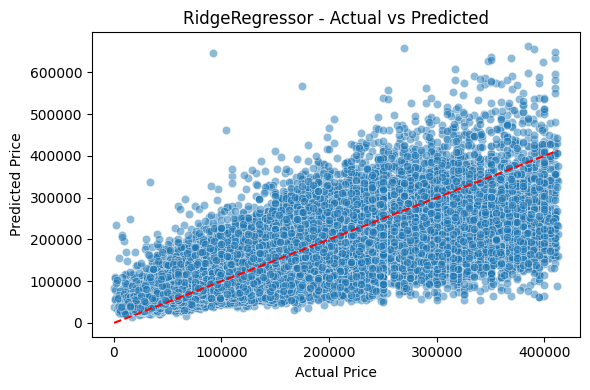


📊 DecisionTreeRegressor Performance:
RMSE: 66,308.63
MAE: 46,063.93
MSE: 4,396,834,419.10
R²: 0.421


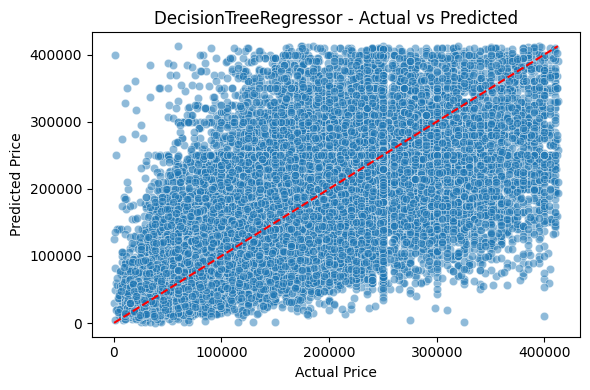


📊 RandomForestRegressor Performance:
RMSE: 53,789.44
MAE: 37,135.24
MSE: 2,893,304,185.60
R²: 0.619


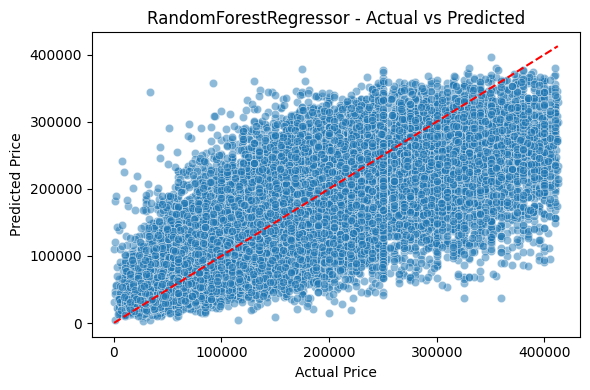


📊 GradientBoostingRegressor Performance:
RMSE: 59,130.52
MAE: 41,143.64
MSE: 3,496,418,503.33
R²: 0.539


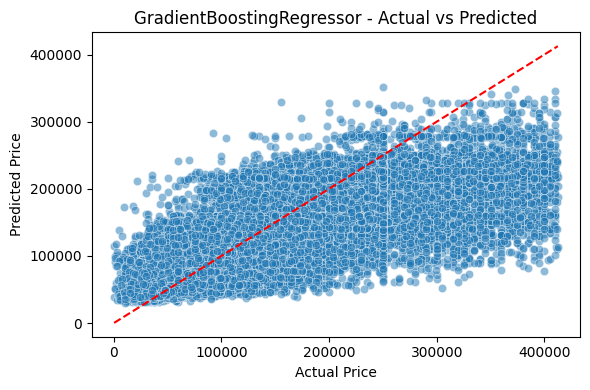

In [54]:
results = []

# Model 1
model = LinearRegression()
results.append(train_and_evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, "Linear Regression"))

# Model 2
model = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', n_jobs=-1)
results.append(train_and_evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, "KNeighborsRegressor"))

# Model 3
model = RidgeRegressor()
results.append(train_and_evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, "RidgeRegressor"))

# Model 4
model = DecisionTreeRegressor(random_state=42)
results.append(train_and_evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, "DecisionTreeRegressor"))

# Model 5
model = RandomForestRegressor(n_estimators=100, random_state=42)
results.append(train_and_evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, "RandomForestRegressor"))

# Model 6
model = GradientBoostingRegressor(random_state=42)
results.append(train_and_evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, "GradientBoostingRegressor"))


In [55]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by RMSE (lower is better)
results_df= results_df.sort_values(by='RMSE', ascending=True)

# Display the summary table
print("\nModel Performance Summary:\n")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Model Performance Summary:

╒═══════════════════════════╤═════════╤═════════╤═════════════╤══════════╕
│ Model                     │    RMSE │     MAE │         MSE │       R² │
╞═══════════════════════════╪═════════╪═════════╪═════════════╪══════════╡
│ RandomForestRegressor     │ 53789.4 │ 37135.2 │ 2.8933e+09  │ 0.618926 │
├───────────────────────────┼─────────┼─────────┼─────────────┼──────────┤
│ RidgeRegressor            │ 58220.6 │ 40698.1 │ 3.38964e+09 │ 0.553554 │
├───────────────────────────┼─────────┼─────────┼─────────────┼──────────┤
│ KNeighborsRegressor       │ 58283.7 │ 40677.4 │ 3.39699e+09 │ 0.552586 │
├───────────────────────────┼─────────┼─────────┼─────────────┼──────────┤
│ Linear Regression         │ 58315.4 │ 40743.8 │ 3.40068e+09 │ 0.5521   │
├───────────────────────────┼─────────┼─────────┼─────────────┼──────────┤
│ GradientBoostingRegressor │ 59130.5 │ 41143.6 │ 3.49642e+09 │ 0.539491 │
├───────────────────────────┼─────────┼─────────┼─────────────┼────────

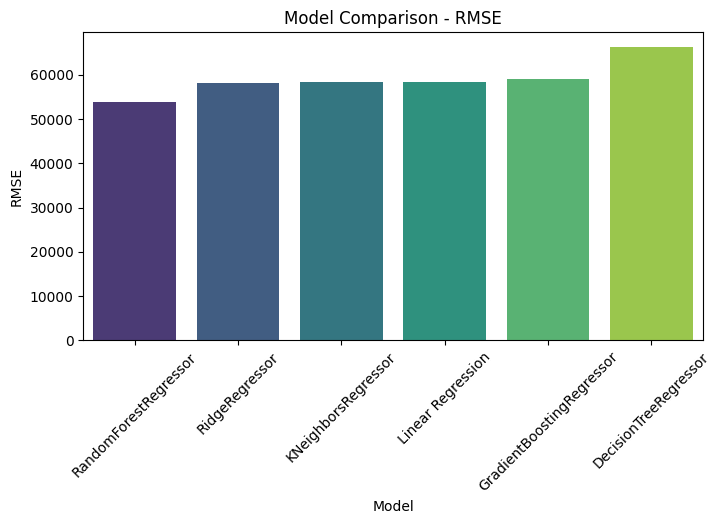

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x='Model', y='RMSE', palette='viridis')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


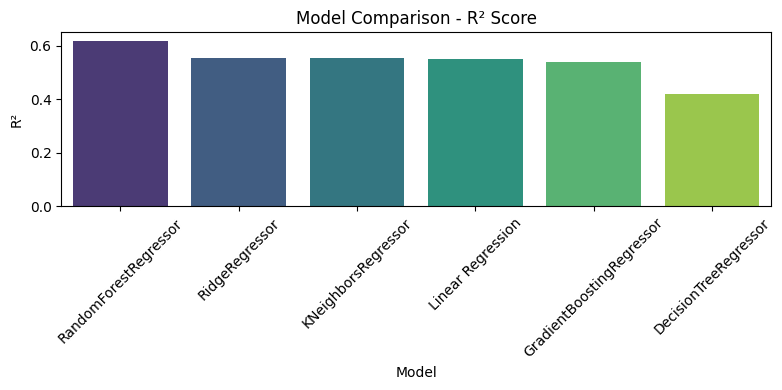

In [57]:
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x='Model', y='R²', palette='viridis')
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ##### Hypertuning DecisionTree Regressor - GridSearchCV

In [ ]:
param_grid_dt = {
    'max_depth': [5,10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['None', 'sqrt', 'log2']

}

base_model = DecisionTreeRegressor(random_state=42)

grid_search_dt = GridSearchCV(estimator=base_model, param_grid=param_grid_dt, cv=3, scoring='r2', 
                              verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train_processed, y_train)

best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test_processed)

print("\nDecision Tree:")
print("Best Params:", grid_search_dt.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_dt))))
print("R²:", r2_score(np.expm1(y_test), np.expm1(y_pred_dt)))

 ##### Hypertuning DecisionTree Regressor - RandomizedSearchCV

In [ ]:


# Define the parameter grid (as distributions or lists)
param_grid_dt =  {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

base_model = DecisionTreeRegressor(random_state=42)

# RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid_dt,
    n_iter=20, 
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_dt.fit(X_train_processed, y_train)
best_model_dt = random_search_dt.best_estimator_

y_pred_dt = best_model_dt.predict(X_test_processed)

# Evaluate the model
print("\nDecision Tree (Randomized Search):")
print("Best Params:", random_search_dt.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_dt))))
print("R²:", r2_score(np.expm1(y_test), np.expm1(y_pred_dt)))

##### Hypertuning GradientBoost - GridSearchCV

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1],
    'min_samples_split': [2, 5]
}

base_model_gb = GradientBoostingRegressor(random_state=42)


grid_search_gb = GridSearchCV(estimator=base_model_gb, param_grid=param_grid_gb, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train_processed, y_train)

best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test_processed)

print("\nGradient Boosting:")
print("Best Params:", grid_search_gb.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_gb))))
print("R²:", r2_score(np.expm1(y_test), np.expm1(y_pred_gb)))

##### Hypertuning KNN

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7]
}

base_model_KNN =KNeighborsRegressor()

grid_search_knn = GridSearchCV(estimator=base_model_KNN, param_grid=param_grid_knn, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train_processed, y_train)

best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test_processed)

print("\nK-Nearest Neighbors:")
print("Best Params:", grid_search_knn.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_knn))))
print("R²:", r2_score(np.expm1(y_test), np.expm1(y_pred_knn)))

In [ ]:
# Manual Loop for KNN with different K values
scores = []
nums = range(1, 10)  # K values to try
best_k = None
best_score_i = -1000

# Iterate through possible K values

for k in nums:
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    
    # Train on the training data
    model.fit(X_train_processed, y_train)

    # Predict and evaluate
    y_pred_knn = model.predict(X_test_processed)
    score = r2_score(np.expm1(y_test), np.expm1(y_pred_knn))

    scores.append(score)

    # Keep track of the best score and corresponding K
    if score > best_score_i:
        best_score_i = score
        best_k = k


# Train the final model with best K
final_knn = KNeighborsRegressor(n_neighbors=best_k, n_jobs=-1)
final_knn.fit(X_train_processed, y_train)
y_pred_final = final_knn.predict(X_test_processed)

# Print the results
print(f"\nBest K: {best_k}")
print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_final))))
print("R²:", r2_score(np.expm1(y_test), np.expm1(y_pred_final)))

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(nums, scores, color = "red", linestyle = "dashed") 
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.title('KNN Elbow Curve (R² Score vs. K)')
plt.xticks(nums)
plt.show()

##### ANN

In [87]:
ANNmodel = Sequential()

In [91]:
ANNmodel.add(Dense(128, activation='relu', input_shape=(1738,)))
ANNmodel.add(BatchNormalization())
ANNmodel.add(Dropout(0.3))

ANNmodel.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
ANNmodel.add(BatchNormalization())
ANNmodel.add(Dropout(0.4))

ANNmodel.add(Dense(128, activation='relu'))
ANNmodel.add(BatchNormalization())
ANNmodel.add(Dropout(0.3))

ANNmodel.add(Dense(1))  


In [92]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
ANNmodel.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [93]:
print(X_train_preprocessed.shape)

(169235, 1738)


In [94]:
# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train).toarray()
X_test_preprocessed = preprocessor.transform(X_test).toarray()

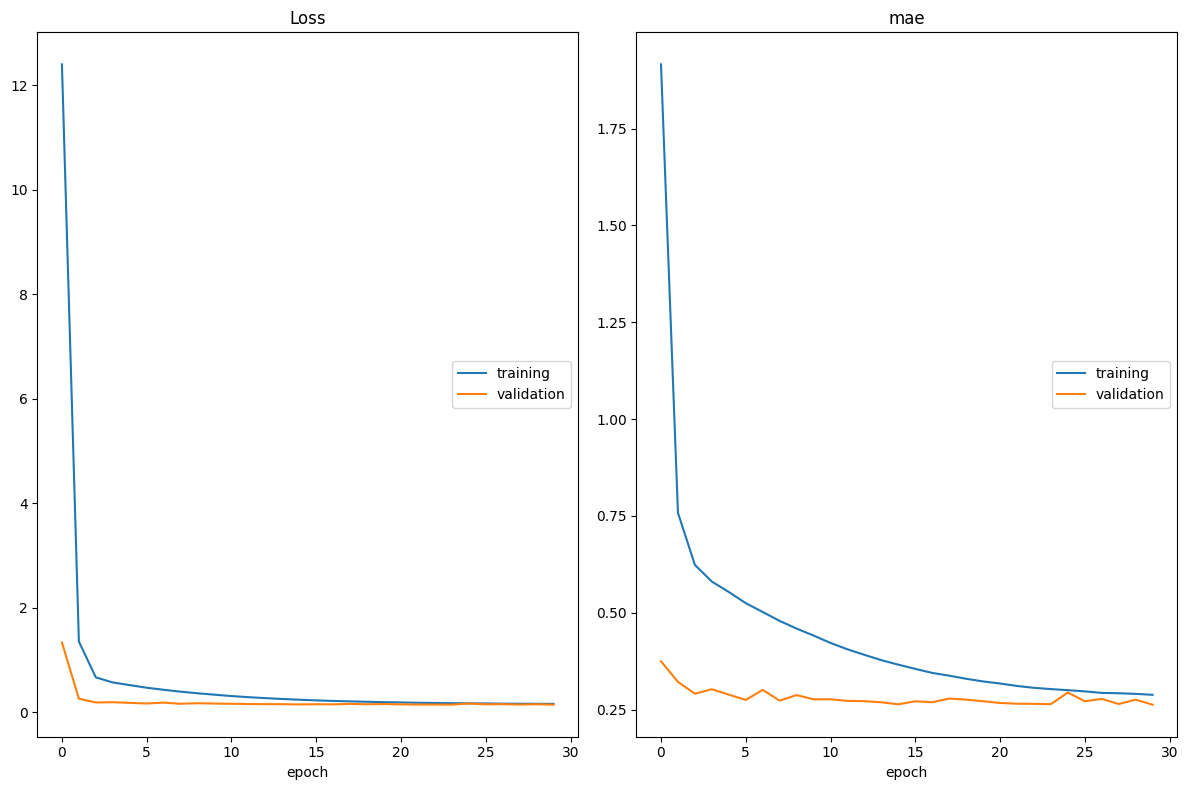

Loss
	training         	 (min:    0.164, max:   12.400, cur:    0.164)
	validation       	 (min:    0.148, max:    1.338, cur:    0.148)
mae
	training         	 (min:    0.288, max:    1.916, cur:    0.288)
	validation       	 (min:    0.263, max:    0.375, cur:    0.263)


In [95]:
ANNmodel.fit(X_train_preprocessed, y_train,
          batch_size = 64,
          epochs = 30,
          validation_data=(X_test_preprocessed, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [96]:
#Evaluate the Model
y_pred_log = ANNmodel.predict(X_test_preprocessed).flatten()

# Convert log predictions back to price scale
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_log)

# Calculate R² Score
r2 = r2_score(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


1323/1323 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
R² Score: 0.682
RMSE: 49101.96
